In [1]:
# Section 1, basics of Gabor
# by 212138-卓旭

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helper import Gabor

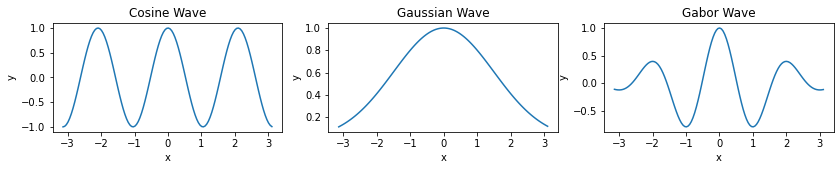

In [3]:
XRange = np.arange(-np.pi, np.pi, 0.05)
CosWave = np.cos(3 * XRange)
GaussianWave = np.exp(-(XRange**2) / (2 * 1.5**2))
MultWave = GaussianWave * CosWave
plt.figure(figsize=(14, 2))
plt.subplot(131); plt.plot(XRange, CosWave); plt.title('Cosine Wave'); plt.xlabel('x'); plt.ylabel('y')
plt.subplot(132); plt.plot(XRange, GaussianWave); plt.title('Gaussian Wave'); plt.xlabel('x'); plt.ylabel('y')
plt.subplot(133); plt.plot(XRange, MultWave); plt.title('Gabor Wave'); plt.xlabel('x'); plt.ylabel('y')
plt.show()

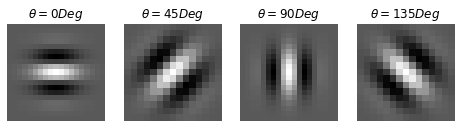

In [5]:
# Effect of \theta
plt.figure(figsize=(8, 2))
for i, theta in enumerate([0, 45, 90, 135]):
    g = Gabor(3, np.radians(theta), 7, 0, 1)
    plt.subplot(1, 4, i + 1); plt.axis('off')
    plt.title(r'$\theta = {} Deg$'.format(theta))
    plt.imshow(g, cmap='gray')
plt.show()

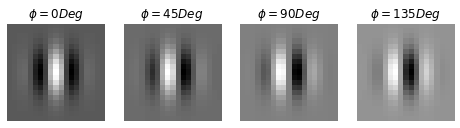

In [6]:
# Effect of \phi
plt.figure(figsize=(8, 2))
for i, phi in enumerate([0, 45, 90, 135]):
    g = Gabor(3, np.radians(90), 7, np.radians(phi), 1)
    plt.subplot(1, 4, i + 1); plt.axis('off')
    plt.title(r'$\phi = {} Deg$'.format(phi))
    plt.imshow(g, cmap='gray')
plt.show()

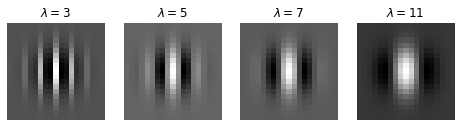

In [7]:
# Effect of \lambda
plt.figure(figsize=(8, 2))
for i, Lambda in enumerate([3, 5, 7, 11]):
    g = Gabor(3, np.radians(90), Lambda, 0, 1)
    plt.subplot(1, 4, i + 1); plt.axis('off')
    plt.title(r'$\lambda = {}$'.format(Lambda))
    plt.imshow(g, cmap='gray')
plt.show()

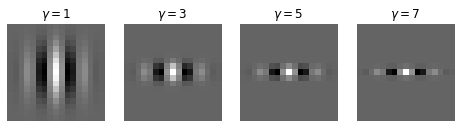

In [8]:
# Effect of \gamma
plt.figure(figsize=(8, 2))
for i, gamma in enumerate([1, 3, 5, 7]):
    g = Gabor(3, np.radians(90), 5, 0, gamma, ksize=17)
    plt.subplot(1, 4, i + 1); plt.axis('off')
    plt.title(r'$\gamma = {}$'.format(gamma))
    plt.imshow(g, cmap='gray')
plt.show()

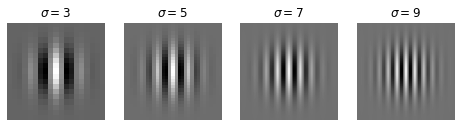

In [9]:
# Effect of \sigma
plt.figure(figsize=(8, 2))
for i, sigma in enumerate([3, 5, 7, 9]):
    g = Gabor(sigma, np.radians(90), 5, 0, 1)
    plt.subplot(1, 4, i + 1); plt.axis('off')
    plt.title(r'$\sigma = {}$'.format(sigma))
    plt.imshow(g, cmap='gray')
plt.show()